# Librerías
Aquí van todas las librerías que usemos, para que al volver a "correr todo", no haya errores tontos :3

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ETL:
Ver si es necesario, si hay NaN, si se abre bien el archivo, etc.

In [39]:
df = pd.read_csv('perretes_final.csv', sep=',')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
2145  Saint Bernard      20.671831              19.182123   7.617800   
2146  Saint Bernard      18.987878              18.322465   8.080945   
2147  Saint Bernard      19.060335              17.985421   7.363878   
2148  Saint Bernard      20.607925              17.452974   7.839965   
2149  Saint Bernard      18.993084              18.835058   8.176060   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
2145         large  68.073101           66.980680                  Fair   
2146         large  69.553902           67.025702                  Fair   
2147         large  65.865740           68.705457                  Fair   
2148         large  62.912167           69.818395                  Fair   
2149         large  70.557580           69.820491                  Fair   

     obey_first_command_%_of_time                           genetic_diseases  \
2145                          >30  heart, hip disorders, fatal stomach bloat   
2146                          >30  heart, hip disorders, fatal stomach bloat   
2147                          >50  heart, hip disorders, fatal stomach bloat   
2148                          >30                                       none   
2149                          <30                                       none   

               house_type owners_physical_activity tricks            Distrito  \
2145                Finca            Muy frecuente    yes             Barajas   
2146  Apartamento mediano            Muy frecuente    yes  Puente de Vallecas   
2147  Apartamento pequeño                Frecuente    yes              Retiro   
2148  Apartamento mediano                Frecuente    yes              Retiro   
2149        Jardín Amplio                Frecuente    yes              Retiro   

      Renta media/pers (€)  Áreas caninas (m²)  
2145               19482.0              5810.0  
2146               10941.0              3843.0  
2147               23925.0              6736.0  
2148               23925.0              6736.0  
2149               23925.0              6736.0

In [40]:
df.isna().any().any()

False

Vale, tenemos un df limpito, cualquiera diría que es a la carta...

# EDA
Aquí voy a hacer algún análisis para ver las correlaciones que hay entre las variables y demás, pues eso, EDA

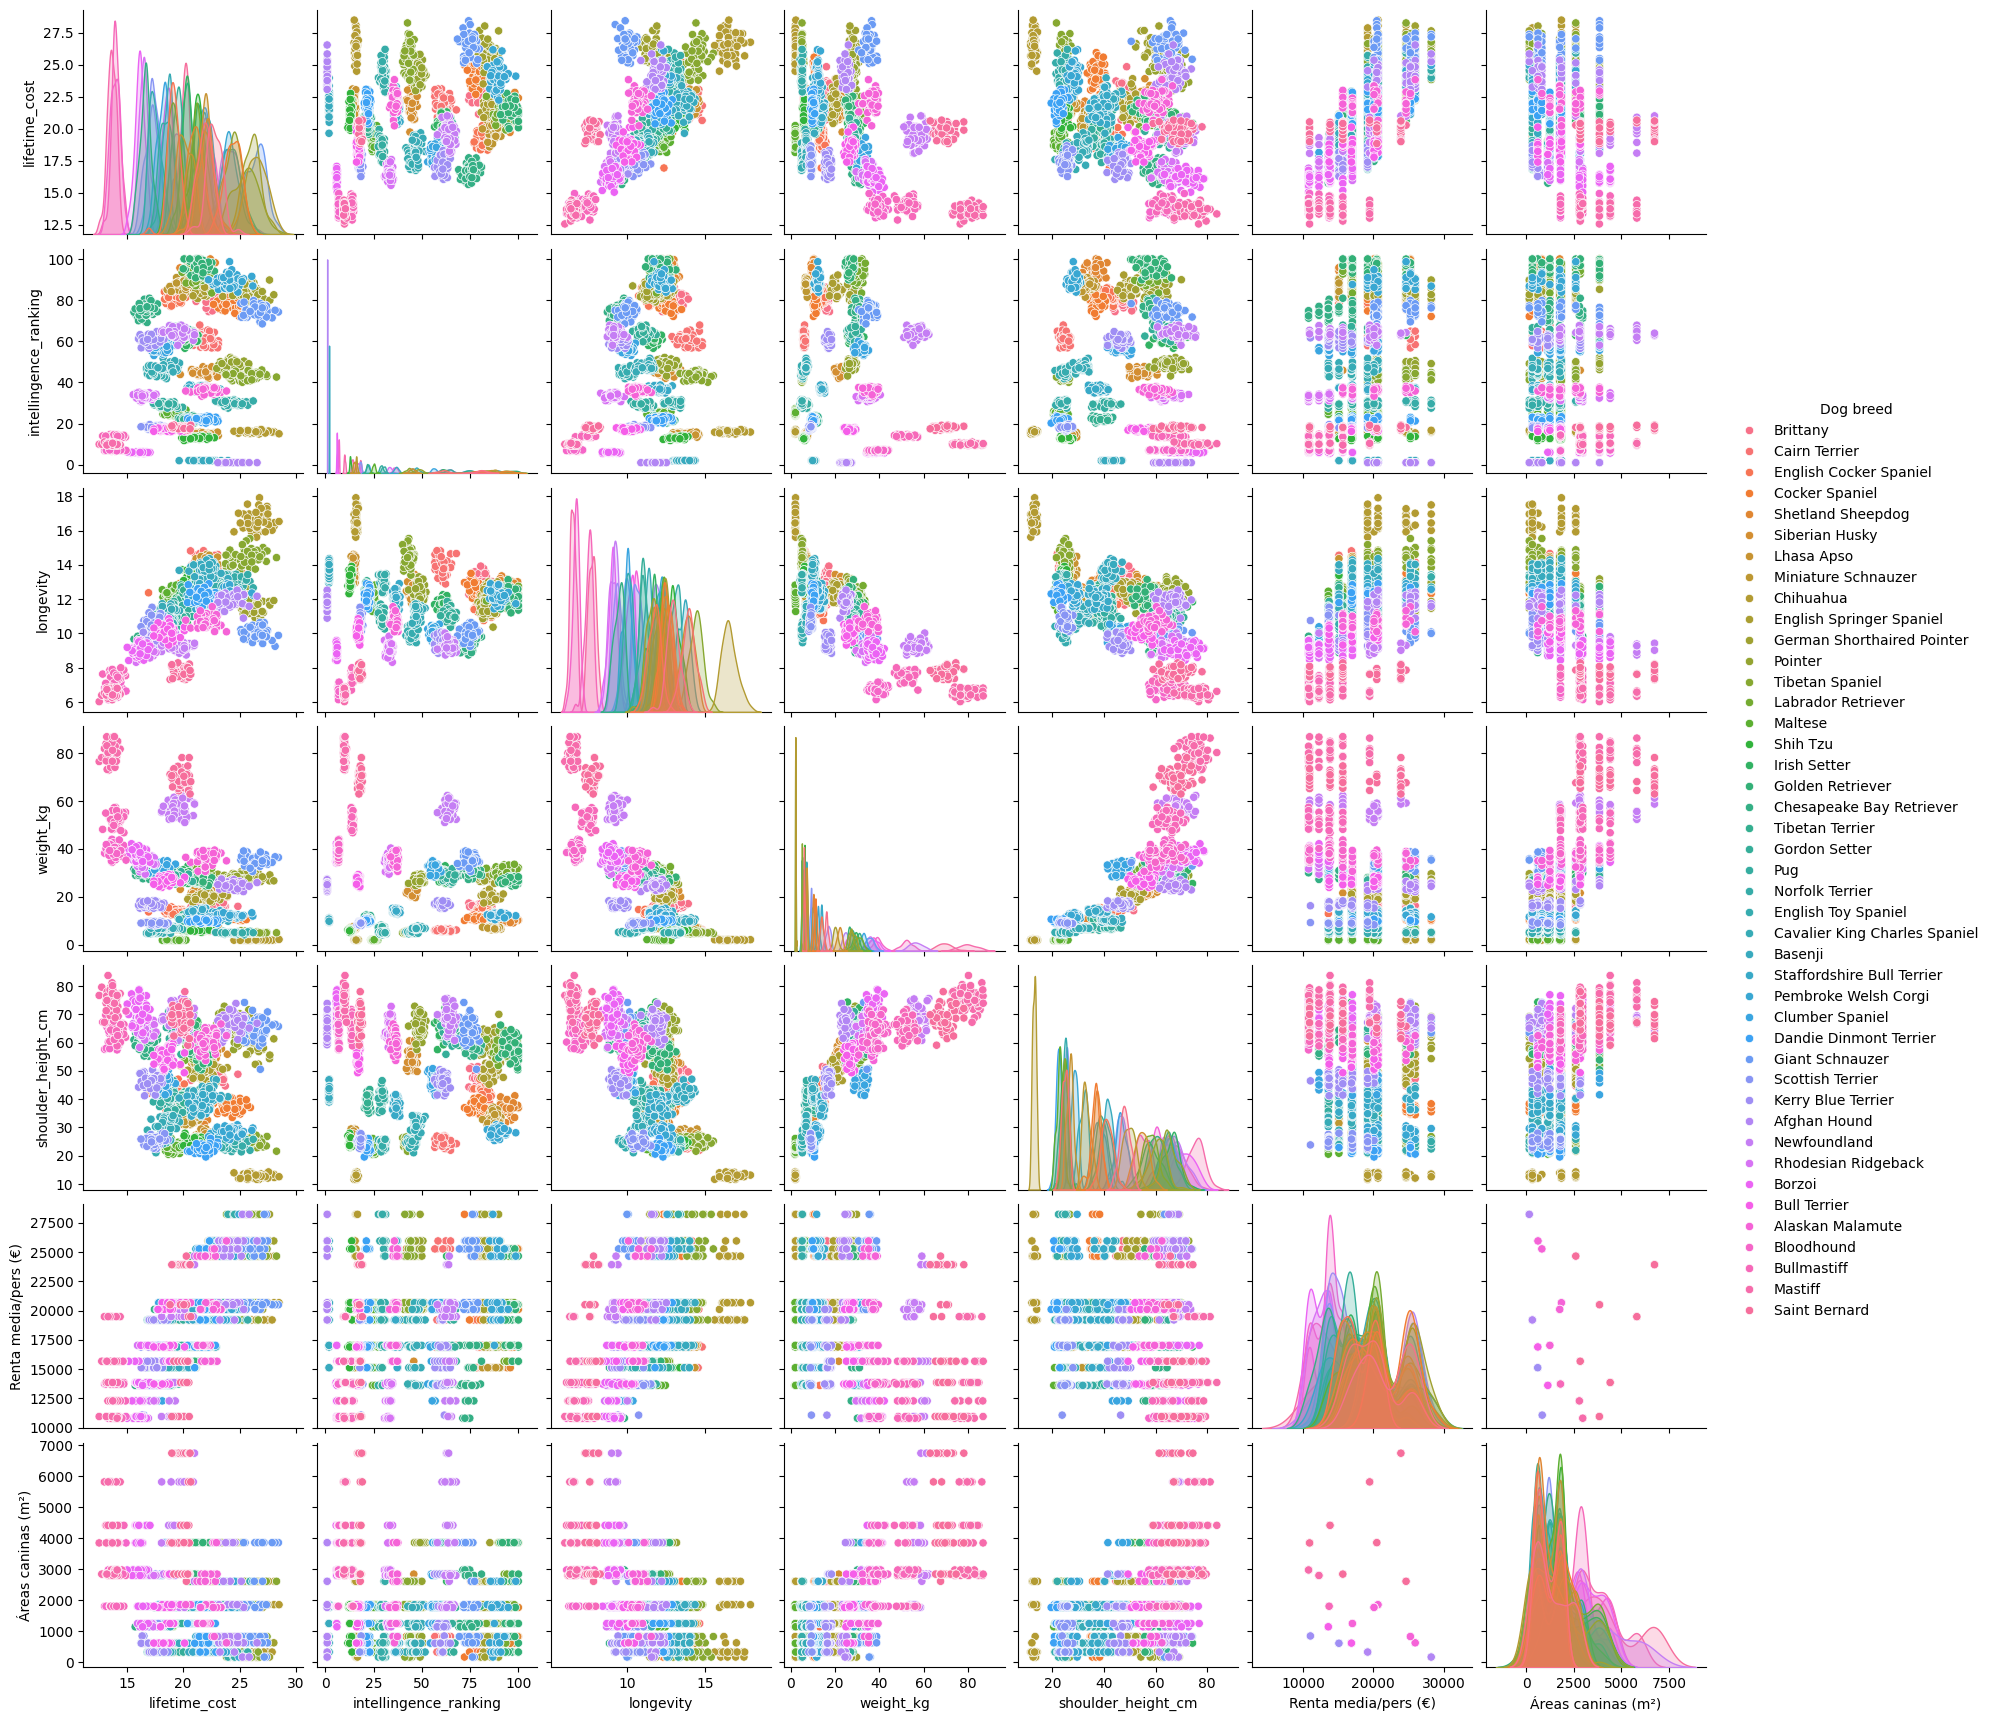

In [41]:
sns.pairplot(df, hue='Dog breed')

Tiene mejor aspecto que el anterior dataset, pero la verdad que no veo bien las correlaciones ._.

In [42]:
df.columns

Index(['Dog breed', 'lifetime_cost', 'intellingence_ranking', 'longevity',
       'size_category', 'weight_kg', 'shoulder_height_cm',
       'intelligence_category', 'obey_first_command_%_of_time',
       'genetic_diseases', 'house_type', 'owners_physical_activity', 'tricks',
       'Distrito', 'Renta media/pers (€)', 'Áreas caninas (m²)'],
      dtype='object')

In [43]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time     object
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
dtype: object

In [44]:
correlation_matrix = df[['lifetime_cost',
                        'intellingence_ranking',
                        'longevity',
                        'weight_kg',
                        'shoulder_height_cm',
                        'Renta media/pers (€)',
                        'Áreas caninas (m²)']].corr()
corr_df=pd.DataFrame(correlation_matrix)
corr_df = corr_df.round(3)
corr_df

lifetime_cost  intellingence_ranking  longevity  \
lifetime_cost                  1.000                  0.281      0.740   
intellingence_ranking          0.281                  1.000      0.173   
longevity                      0.740                  0.173      1.000   
weight_kg                     -0.412                 -0.112     -0.765   
shoulder_height_cm            -0.304                  0.033     -0.655   
Renta media/pers (€)           0.710                  0.220      0.519   
Áreas caninas (m²)            -0.283                 -0.131     -0.479   

                       weight_kg  shoulder_height_cm  Renta media/pers (€)  \
lifetime_cost             -0.412              -0.304                 0.710   
intellingence_ranking     -0.112               0.033                 0.220   
longevity                 -0.765              -0.655                 0.519   
weight_kg                  1.000               0.838                -0.298   
shoulder_height_cm         0.838               1.000                -0.215   
Renta media/pers (€)      -0.298              -0.215                 1.000   
Áreas caninas (m²)         0.624               0.483                -0.200   

                       Áreas caninas (m²)  
lifetime_cost                      -0.283  
intellingence_ranking              -0.131  
longevity                          -0.479  
weight_kg                           0.624  
shoulder_height_cm                  0.483  
Renta media/pers (€)               -0.200  
Áreas caninas (m²)                  1.000

Se pueden ver muy bien las correlaciones, la única pena es que con las variables de tipo 'object' no funciona, habría que hacer una conversión/encoder (Ej.: OrdinalEncoder, OneHotEncoder), para la próxima lo hago.

En cualquier caso, se puede ver que el único por encima de un 80% de correlación, que recordemos que por convenio se dice que a partir de ese porcentaje se dice que son variables altamente correlacionadas, es el ""weight_kg - shoulder_height_cm"", poca sorpresa.

Hay otras como ""longetivity - lifetime_cost"", ""Renta media/pers (€) - lifetime_cost"", ""longevity - weight_kg"", que también tienen relaciones muy fuertes, pero que no llegan al mínimo.

Por lo que, visto lo visto, weight_kg se podría predecir de manera fácil por las variables longevity y shoulder_height_cm.

## Encoding GOO

In [45]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time     object
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
dtype: object

Dog breed y Distrito no se van a encodear, no tiene sentido.

Las que hay que retocar:


- size_category --> OrdinalEncoder  ['medium', 'small', 'large']


- intelligence_category --> OrdinalEncoder ['Excellent', 'Above average', 'Average', 'Brightest', 'Lowest', 'Fair']


- obey_first_command_%_of_time --> LIMPIAR, QUITAR SIMBOLO, y hacer int.


- genetic_diseases --> No está en número, te pone cuáles son, no sé qué hacer con eso.


- house_type --> OrdinalEncoder ['Finca', 'Apartamento mediano', 'Jardín Amplio', 'Apartamento pequeño']


- owners_physical_activity --> OrdinalEncoder ['Muy frecuente', 'Nada', 'Poco frecuente', 'Frecuente']


- tricks --> OneHotEncoder ['no', 'yes']

#### **Ligero paréntesis de ETL, había que haber adaptado las columnas genetic_diseases y obey_first_command_%_of_time a números**

##### Limpieza/adaptación de la columna genetic_diseases a números:

In [46]:
df['genetic_diseases'].unique()

array(['none', "'lion jaw', heart problems  ", 'eye, skin problems',
       'eye problems, deafness, skin + heart problems, blood clotting disorders',
       "'dry eye'", 'liver, sinus problems', 'knee problems',
       'hip, eye, skin problems; enzyme deficiency', 'hip problems',
       'elbows, hips, eyes', 'heart problems', 'eye problems',
       'hip, eye problems', 'elbows, hips, eyes, heart ',
       'heart, spinal problems', 'kidney, eye problems, anaemia',
       'cataracts + other eye problems, connective tissue, nerves, kidneys, spine, blood clotting disorders',
       'blood clotting disorder', 'hip problems, heart defects',
       'birth defects, hip problems',
       'heart problems, zinc metabolism disorder',
       'hip problems, dwarfism', 'fatal stomach bloat, skin problems',
       'eye, hip problems', 'hip, heart problems',
       'heart, hip disorders, fatal stomach bloat'], dtype=object)

Básicamente, si es 'none' es que no tiene, y si tiene es un número determinado por comas:

In [47]:
diseases = df['genetic_diseases']
type(diseases)

pandas.core.series.Series

In [48]:
list_d = []
for d in diseases:
    if d == 'none':
        list_d.append(0)
    else:
        count_comas = d.count(',')
        list_d.append(count_comas+1)

set(list_d)

{0, 1, 2, 3, 4, 6}

In [67]:
df['n_genetic_diseases'] = list_d
df.sample(3)

Dog breed  lifetime_cost  intellingence_ranking  \
66                    Cairn Terrier      21.826781              60.807109   
1911               Alaskan Malamute      21.266458              36.860827   
1248  Cavalier King Charles Spaniel      18.161602              46.810089   

      longevity size_category  weight_kg  shoulder_height_cm  \
66    13.019271         small   5.428113           26.777139   
1911  10.594729         large  38.766669           62.852675   
1248  11.575792         small   6.906788           31.803056   

     intelligence_category  obey_first_command_%_of_time  \
66           Above average                            30   
1911               Average                            50   
1248               Average                            50   

            genetic_diseases           house_type owners_physical_activity  \
66                      none                Finca           Poco frecuente   
1911                    none                Finca                Frecuente   
1248  heart, spinal problems  Apartamento pequeño           Poco frecuente   

     tricks             Distrito  Renta media/pers (€)  Áreas caninas (m²)  \
66      yes  Fuencarral-El Pardo               20671.0              1852.0   
1911     no               Tetuán               17026.0              1246.0   
1248    yes    Villa de Vallecas               13605.0              1140.0   

      n_genetic_diseases  
66                     0  
1911                   0  
1248                   2

##### Limpieza de columna obey_first_command_%_of_time

In [51]:
df['obey_first_command_%_of_time'].unique()

array(['>85', '<30', '>50', '>95', '>70', '>30'], dtype=object)

In [56]:
df['obey_first_command_%_of_time'] = df['obey_first_command_%_of_time'].str.strip('>')
df['obey_first_command_%_of_time'] = df['obey_first_command_%_of_time'].str.strip('<')
df['obey_first_command_%_of_time'] = pd.to_numeric(df['obey_first_command_%_of_time'])
df['obey_first_command_%_of_time'].unique()

array([85, 30, 50, 95, 70])

In [57]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time      int64
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
n_genetic_diseases                int64
dtype: object

**Con esto la limpieza está ya hecha**

### OneHotEncoder
Recordemos que con este tipo de encoder sólo vamos a adaptar la columna tricks:

In [68]:
# Llamando al encoder
enc1 = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Haciendo el fit y asignandolo a variable del encoder
one_hot_encoded_matrix = enc1.fit_transform(df[['tricks']])

# Pillando solo una columna de la matrix creada, uso la segunda columna
# porque es la que nos da que 1 sea que sí, y 0 que no.
one_hot_encoded_column = one_hot_encoded_matrix[:,1]

# Creando nueva columna con la info de tricks_yes encodeada
df.loc[:, 'tricks_yes'] = one_hot_encoded_column

df.sample(3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dog breed  lifetime_cost  intellingence_ranking  longevity  \
1957          Bloodhound      13.710901               6.857618   6.704092   
1627  Kerry Blue Terrier      16.280120              56.803988   9.021603   
300           Lhasa Apso      21.200715              14.281675  13.998949   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
1957         small  34.412588           59.895215                Lowest   
1627        medium  16.716702           46.240827         Above average   
300          small   7.174568           24.780126                  Fair   

      obey_first_command_%_of_time                    genetic_diseases  \
1957                            30  fatal stomach bloat, skin problems   
1627                            95                                none   
300                             85                           'dry eye'   

               house_type owners_physical_activity tricks  \
1957  Apartamento pequeño                     Nada    yes   
1627                Finca                     Nada    yes   
300   Apartamento pequeño                     Nada    yes   

                 Distrito  Renta media/pers (€)  Áreas caninas (m²)  \
1957   Puente de Vallecas               10941.0              3843.0   
1627  San Blas-Canillejas               15115.0               609.0   
300            Arganzuela               20103.0              1764.0   

      n_genetic_diseases  tricks_yes  
1957                   2         1.0  
1627                   0         1.0  
300                    1         1.0

### OrdinalEncoder
En el ordinal encoder tenemos varias columnas a tratar:
- size_category
- intelligence_category
- house_type
- owners_physical_activity

Creo que esas son todas

In [70]:
df1 = df[['size_category','intelligence_category', 'house_type', 'owners_physical_activity']]

unique_values_dict = {}
for column in df1.columns:
    unique_values_dict[column] = df1[column].unique()

# Display unique values
for column, values in unique_values_dict.items():
    print(f"Unique values in {column}: {values}")

Unique values in size_category: ['medium' 'small' 'large']
Unique values in intelligence_category: ['Excellent' 'Above average' 'Average' 'Brightest' 'Lowest' 'Fair']
Unique values in house_type: ['Finca' 'Apartamento mediano' 'Jardín Amplio' 'Apartamento pequeño']
Unique values in owners_physical_activity: ['Muy frecuente' 'Nada' 'Poco frecuente' 'Frecuente']


In [71]:
## Lo primero es guardar las categorías ordenadas en listas.
cat_size = ['small', 'medium', 'large']
cat_int = ['Lowest', 'Fair', 'Average', 'Above average', 'Excellent', 'Brightest']
cat_house = ['Apartamento pequeño', 'Apartamento mediano', 'Jardín Amplio', 'Finca']
cat_owners_act = ['Nada', 'Poco frecuente', 'Frecuente', 'Muy frecuente']

## Llamando/definiendo al encoder
enc2 = OrdinalEncoder(categories=[cat_size, cat_int, cat_house, cat_owners_act])

## Haciendo el fit y asignando el transform a una variable
data_encoded = enc2.fit_transform(df[['size_category','intelligence_category', 'house_type', 'owners_physical_activity']])

## Asignando columnas en el df a los datos encodeados
df[['size_category_enc','intelligence_category_enc', 'house_type_enc', 'owners_physical_activity_enc']] = data_encoded
df.sample(5)

Dog breed  lifetime_cost  intellingence_ranking  \
2078                     Mastiff      13.562614              10.448496   
799                     Shih Tzu      20.654949              12.598143   
700                      Maltese      19.659803              25.269764   
1026               Gordon Setter      19.528550              64.130502   
518   German Shorthaired Pointer      25.356132              80.095341   

      longevity size_category  weight_kg  shoulder_height_cm  \
2078   6.532256         small  74.111739           72.720037   
799   13.390611         small   5.775046           23.646314   
700   11.833141         small   2.026221           22.694645   
1026  11.113153         large  28.350792           68.269476   
518   11.215898         large  26.443022           59.872828   

     intelligence_category  obey_first_command_%_of_time     genetic_diseases  \
2078                Lowest                            30  hip, heart problems   
799                 Lowest                            85         eye problems   
700              Brightest                            95       heart problems   
1026         Above average                            70         hip problems   
518              Excellent                            95         hip problems   

      ... tricks             Distrito Renta media/pers (€) Áreas caninas (m²)  \
2078  ...    yes          Carabanchel              12275.0             2794.0   
799   ...    yes  San Blas-Canillejas              15115.0              609.0   
700   ...    yes           Arganzuela              20103.0             1764.0   
1026  ...     no        Ciudad Lineal              16890.0              614.0   
518   ...     no  Fuencarral-El Pardo              20671.0             1852.0   

      n_genetic_diseases  tricks_yes  size_category_enc  \
2078                   2         1.0                0.0   
799                    1         1.0                0.0   
700                    1         1.0                0.0   
1026                   1         0.0                2.0   
518                    1         0.0                2.0   

      intelligence_category_enc  house_type_enc  owners_physical_activity_enc  
2078                        0.0             1.0                           0.0  
799                         0.0             0.0                           0.0  
700                         5.0             0.0                           0.0  
1026                        3.0             1.0                           2.0  
518                         4.0             2.0                           2.0  

[5 rows x 22 columns]

## Volviendo a hacer EDA pero añadiendo los datos limpiados y encodeados

In [76]:
# dataframe nuevo sin object types
columns_todrop = [
                'size_category',
                'intelligence_category',
                'genetic_diseases',
                'house_type',
                'owners_physical_activity',
                'tricks',
                'Distrito'
                ]

df_limpio = df.drop(columns=columns_todrop, axis=1)
df_limpio.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
weight_kg                       float64
shoulder_height_cm              float64
obey_first_command_%_of_time      int64
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
n_genetic_diseases                int64
tricks_yes                      float64
size_category_enc               float64
intelligence_category_enc       float64
house_type_enc                  float64
owners_physical_activity_enc    float64
dtype: object

In [77]:
correlation_matrix2 = df_limpio.drop(columns=['Dog breed'],axis=1).corr()
corr_df2 = pd.DataFrame(correlation_matrix2)
corr_df2 = corr_df2.round(3)
corr_df2

lifetime_cost  intellingence_ranking  longevity  \
lifetime_cost                         1.000                  0.281      0.740   
intellingence_ranking                 0.281                  1.000      0.173   
longevity                             0.740                  0.173      1.000   
weight_kg                            -0.412                 -0.112     -0.765   
shoulder_height_cm                   -0.304                  0.033     -0.655   
obey_first_command_%_of_time          0.114                  0.516      0.054   
Renta media/pers (€)                  0.710                  0.220      0.519   
Áreas caninas (m²)                   -0.283                 -0.131     -0.479   
n_genetic_diseases                    0.015                  0.257     -0.027   
tricks_yes                           -0.132                 -0.474     -0.081   
size_category_enc                    -0.244                 -0.065     -0.570   
intelligence_category_enc             0.207                  0.786      0.147   
house_type_enc                       -0.101                 -0.032     -0.240   
owners_physical_activity_enc         -0.110                 -0.033     -0.216   

                              weight_kg  shoulder_height_cm  \
lifetime_cost                    -0.412              -0.304   
intellingence_ranking            -0.112               0.033   
longevity                        -0.765              -0.655   
weight_kg                         1.000               0.838   
shoulder_height_cm                0.838               1.000   
obey_first_command_%_of_time     -0.033               0.064   
Renta media/pers (€)             -0.298              -0.215   
Áreas caninas (m²)                0.624               0.483   
n_genetic_diseases                0.105               0.054   
tricks_yes                        0.038              -0.031   
size_category_enc                 0.733               0.859   
intelligence_category_enc        -0.086               0.033   
house_type_enc                    0.307               0.357   
owners_physical_activity_enc      0.271               0.321   

                              obey_first_command_%_of_time  \
lifetime_cost                                        0.114   
intellingence_ranking                                0.516   
longevity                                            0.054   
weight_kg                                           -0.033   
shoulder_height_cm                                   0.064   
obey_first_command_%_of_time                         1.000   
Renta media/pers (€)                                 0.096   
Áreas caninas (m²)                                  -0.051   
n_genetic_diseases                                   0.183   
tricks_yes                                          -0.277   
size_category_enc                                    0.005   
intelligence_category_enc                            0.426   
house_type_enc                                      -0.013   
owners_physical_activity_enc                        -0.018   

                              Renta media/pers (€)  Áreas caninas (m²)  \
lifetime_cost                                0.710              -0.283   
intellingence_ranking                        0.220              -0.131   
longevity                                    0.519              -0.479   
weight_kg                                   -0.298               0.624   
shoulder_height_cm                          -0.215               0.483   
obey_first_command_%_of_time                 0.096              -0.051   
Renta media/pers (€)                         1.000              -0.200   
Áreas caninas (m²)                          -0.200               1.000   
n_genetic_diseases                           0.026               0.115   
tricks_yes                                  -0.116               0.044   
size_category_enc                           -0.190               0.419   
intelligence_category_enc                    0.15

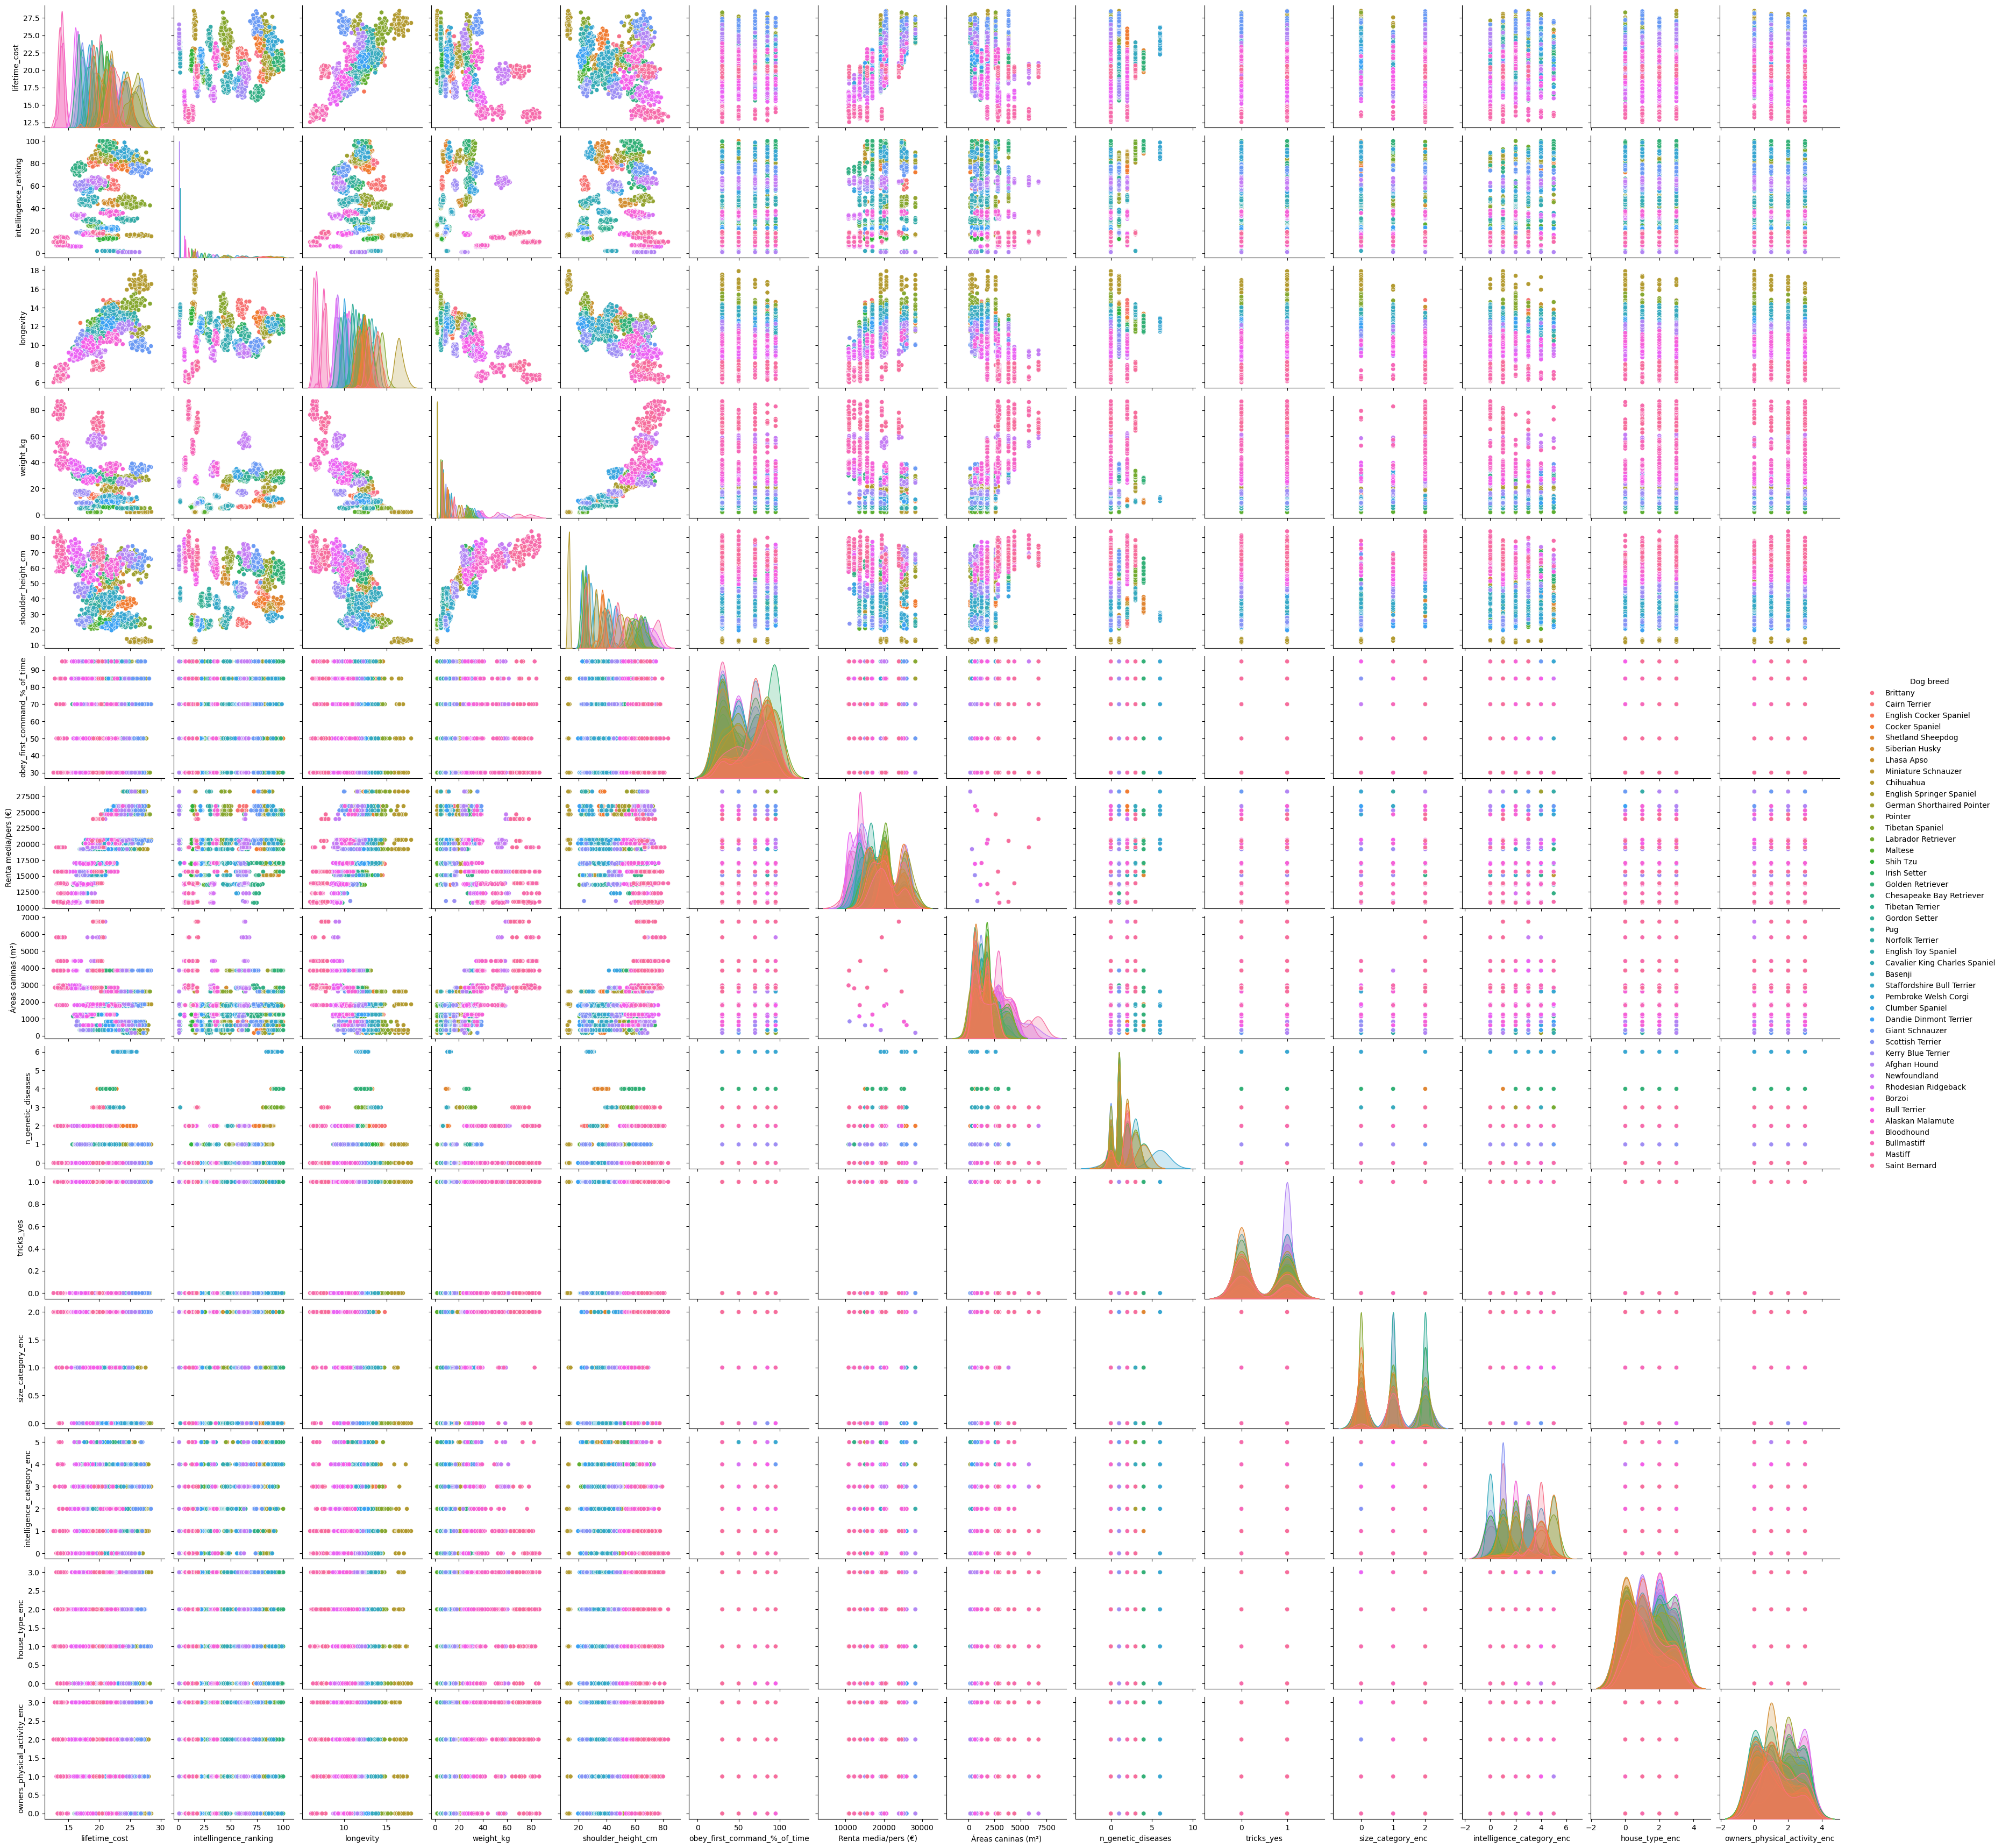

In [78]:
sns.pairplot(df_limpio, hue='Dog breed')

Lo hice para ver si servía, pero entre que es tan pequeño, y que las correlaciones con los datos categoricos no se ven bien en gráfico. Pues en fin.